# Mitlab

- todo add source

In [1]:
import sys
sys.path.append("../")
import pandas as pd
import matplotlib.pyplot as plt
import plotly
plotly.offline.init_notebook_mode(connected=True)
import pyadlml
import numpy as np
from pyadlml.dataset import set_data_home, fetch_mitlab

set_data_home('/home/chris/code/adlml/data_home')
data = fetch_mitlab(keep_original=True, cache=True, subject='subject1')

In [2]:
from pyadlml.dataset.stats import contingency_table_triggers, contingency_intervals, contingency_table_triggers_01
con_trigg = contingency_table_triggers(data.df_devices, data.df_activities)
con_trigg_01 = contingency_table_triggers_01(data.df_devices, data.df_activities)
#con_int = contingency_intervals(data.df_devices, data.df_activities)

In [3]:
#con_trigg.to_csv('/tmp/text.csv')
con_trigg = pd.read_csv('/tmp/text.csv', index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/text.csv'

In [ ]:
a = np.array(['a','b','c'])
np.append(a,np.array([""]))

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
from pyadlml.dataset.devices import device_rep1_2_rep2
rep2_nodrop, syn_acts = device_rep1_2_rep2(data.df_devices, drop=False)
rep2_drop = device_rep1_2_rep2(data.df_devices, drop=True)
print(data.df_devices)

# Activites ~ Devices


### Triggers
Lets look at the connection between the activities and the device activations.

In [ ]:
import sys
sys.path.append("../")
import pandas as pd
import matplotlib.pyplot as plt
import plotly
plotly.offline.init_notebook_mode(connected=True)
import pyadlml
import numpy as np
from pyadlml.dataset import set_data_home, fetch_mitlab

set_data_home('/home/chris/code/adlml/data_home')
data = fetch_mitlab(keep_original=True, cache=True, subject='subject1')

In [ ]:
from pyadlml.dataset.stats import contingency_table_triggers, contingency_intervals, contingency_table_triggers_01
#con_trigg = contingency_table_triggers(data.df_devices, data.df_activities)
con_trigg_01 = contingency_table_triggers_01(data.df_devices, data.df_activities)
#con_int = contingency_intervals(data.df_devices, data.df_activities)

In [ ]:
from pyadlml.dataset.plot import heatmap_contingency_triggers_01

idle = True
z_scale = 'log'
numbers = False
heatmap_contingency_triggers_01(con_tab_01=con_trigg_01, z_scale=z_scale, idle=idle, numbers=numbers, figsize=(20,10));

In [ ]:
from pyadlml.dataset.plot import heatmap_contingency_overlaps

z_scale='log'
idle=True
numbers=False
heatmap_contingency_overlaps(con_tab=con_int, z_scale=z_scale, idle=idle, figsize=(17,13), numbers=numbers)

We can see that there are sensors that heavily trigger for certain activities e.g hall-bathroom door and use toilet

Sadly the different states of a device don't convey much information. It would have been nice if an activity is only involved with a single device transition.

## Duration

the overlap of the intervals is also interesting.

# Representations

There are different ways to represent our data. One way is to discretize the data into intervals.

- RAW representation _____|^^^^^^|______  
    is 1 whenever the sensor is 'on' and 0 otherwise 

- Changepoint representation ______|________|______  
    sensor gives a 1 to timeslices where the sensor reading changes

- LastFired representation ______|^^^^^^^^^  
    last sensor that changed state gives cont. 1

- Lagged representation
    the 

## RAW - representation

In [2]:
import sys
sys.path.append("../")
import pandas as pd
import matplotlib.pyplot as plt
import plotly
plotly.offline.init_notebook_mode(connected=True)
import pyadlml
import numpy as np
from pyadlml.dataset import set_data_home, fetch_mitlab

set_data_home('/home/chris/code/adlml/data_home')
data = fetch_mitlab(keep_original=True, cache=True, subject='subject1')

In [3]:
from pyadlml.preprocessing import DiscreteEncoder

enc_raw = DiscreteEncoder(rep='raw')
raw = enc_raw.fit_transform(data.df_devices)

In [4]:
from pyadlml.preprocessing import LabelEncoder

enc_lbl = LabelEncoder(raw)
lbls = enc_lbl.fit_transform(data.df_activities)

/home/chris/Desktop/code/adlml/pyadlml/venv_pyadlml/lib/python3.9/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



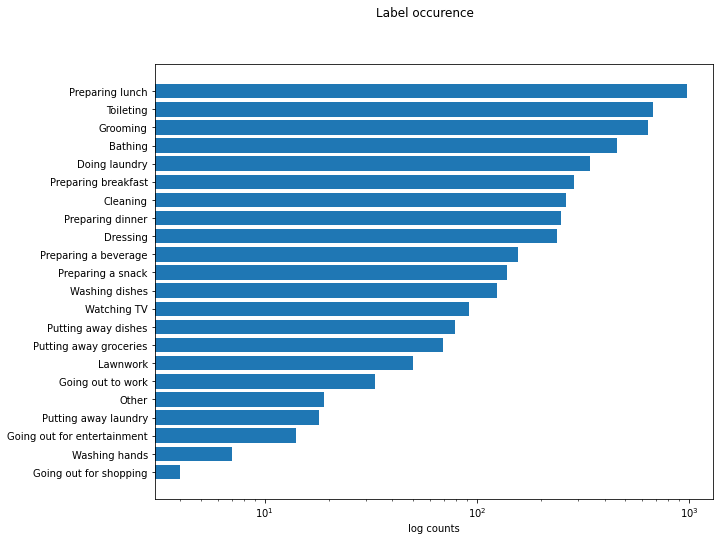

In [6]:
from pyadlml.dataset.plot.discrete import hist_activities

hist_activities(enc_lbl.inverse_transform(lbls), scale='log', figsize=(10,8))

In [8]:
from pyadlml.dataset.plot.discrete import heatmap_contingency

z_scale = 'log'
rep = 'raw'

heatmap_contingency(raw, enc_lbl.inverse_transform(lbls), 
                       rep=rep, z_scale=z_scale);

ValueError: Length mismatch: Expected axis has 0 elements, new values have 2 elements

In [ ]:
from pyadlml.dataset.plot.raw import heatmap_cross_correlation

heatmap_cross_correlation(raw);

## Changepoint - representation
Raw: _____|^^^^^^|______  

CP :  ______|________|______  

sensor gives a 1 to timeslices where the sensor reading changes

In [ ]:
from pyadlml.preprocessing import ChangepointEncoder

idle = True
t_res = '60s'

cp_enc = ChangepointEncoder(t_res=t_res)
cp = cp_enc.fit_transform(data.df_devices)

In [ ]:
from pyadlml.preprocessing import LabelEncoder

enc_lbl = LabelEncoder(cp, idle=idle)
lbls = enc_lbl.fit_transform(data.df_activities)

In [ ]:
def check_changepoint(cp):
    # should not contain any  nan values
    assert not cp.isnull().values.any()

check_changepoint(cp)

In [ ]:
from pyadlml.dataset.plot.raw import heatmap_contingency_01

z_scale = 'log'
rep = 'Changepoint'

heatmap_contingency_01(cp, enc_lbl.inverse_transform(lbls), rep=rep, z_scale=z_scale);

In [ ]:
from pyadlml.dataset.plot.raw import heatmap_cross_correlation

heatmap_cross_correlation(cp);

## LastFired - representation
______|^^^^^^^^^  

last sensor that changed state gives cont. 1

In [ ]:
from pyadlml.preprocessing import LastFiredEncoder

t_res = '60s'
idle=True

lf_enc = LastFiredEncoder(t_res=t_res)
lf = lf_enc.fit_transform(data.df_devices)

In [ ]:
from pyadlml.preprocessing import LabelEncoder

enc_lbl = LabelEncoder(lf, idle=idle)
lbls = enc_lbl.fit_transform(data.df_activities)

In [ ]:
def check_lastfired(lf):
    # should not contain any  nan values
    assert not lf.isnull().values.any()
    
    # each row has to have exactly one device being on
    for row in lf.iterrows():
        assert 1 == row[1].values.sum()

check_lastfired(lf)

In [ ]:
from pyadlml.dataset.plot.raw import heatmap_contingency_01

z_scale = 'log'
rep = 'LastFired'

heatmap_contingency_01(lf, enc_lbl.inverse_transform(lbls), rep=rep, z_scale=z_scale);

In [ ]:
from pyadlml.dataset.plot.raw import heatmap_cross_correlation

heatmap_cross_correlation(lf);

## Image - representation

a lot of timeseries can be represented as images. There are good algorithms for images available. There are Recurrence Plots (RP), Gramian Angular Field (GAF) (bad for binary data), Markov Transition Field (MTF): https://doi.org/10.3390/electronics9010068.


Gramian Angular field: 
    https://medium.com/analytics-vidhya/encoding-time-series-as-images-b043becbdbf3
    
    https://pyts.readthedocs.io/en/stable/auto_examples/image/plot_mtf.html#sphx-glr-auto-examples-image-plot-mtf-py

### Lagged RAW

The lagged raw representation generates a 3D tensor from the raw input. A state at time $t$ is $1D$ vector. The window size determines how big the $2D$ picture is. Stack the windows in the third dimension.

Also see last part of
https://towardsdatascience.com/ml-approaches-for-time-series-4d44722e48fe

In [ ]:
from pyadlml.preprocessing import LaggedRawEncoder, LaggedLabelEncoder

window_size = 20
t_res = '2min'
sample_strat = 'int_coverage'
idle = True

enc_lgd_raw = LaggedRawEncoder(window_size, 
                               t_res=t_res, 
                               sample_strat=sample_strat)

images = enc_lgd_raw.fit_transform(data.df_devices)

In [ ]:
images.shape

In [ ]:
enc_lgd_lbl = LaggedLabelEncoder(data.df_devices,
                                        window_size, 
                                        t_res=t_res,
                                        idle=idle)

labels = enc_lgd_lbl.fit_transform(data.df_activities)
labels.shape

In [ ]:
from pyadlml.dataset.plot.image import mean_image

mean_image(images, data.devices)

In [ ]:
from pyadlml.dataset.plot.image import mean_image_per_activity

X = images
y = enc_lgd_lbl.inverse_transform(labels)

mean_image_per_activity(X, y, data.devices)

# Lagged Changepoint representation

In [ ]:
from pyadlml.preprocessing import LaggedChangepointEncoder
window_size = 20
t_res = '2min'
sample_strat = 'int_coverage'
idle = True


enc_lgd_cp = LaggedChangepointEncoder(window_size, t_res=t_res)
images = enc_lgd_cp.fit_transform(data.df_devices)
images.shape

In [ ]:
from pyadlml.dataset.plot.image import mean_image

mean_image(images, data.devices)

In [ ]:
enc_lgd_lbl = LaggedLabelEncoder(data.df_devices,
                                        window_size, 
                                        t_res=t_res,
                                        idle=idle)

labels = enc_lgd_lbl.fit_transform(data.df_activities)
labels.shape

In [ ]:
from pyadlml.dataset.plot.image import mean_image_per_activity

X = images
y = enc_lgd_lbl.inverse_transform(labels)

mean_image_per_activity(X, y, data.devices)

## Lagged Last Fired Encoder

In [ ]:
from pyadlml.preprocessing import LaggedLastFiredEncoder
window_size = 20
t_res = '2min'
sample_strat = 'int_coverage'
idle=True


enc_lgd_lf = LaggedLastFiredEncoder(window_size, t_res=t_res)
images = enc_lgd_lf.fit_transform(data.df_devices)
images.shape

In [ ]:
from pyadlml.dataset.plot.image import mean_image

mean_image(images, data.devices)

In [ ]:
enc_lgd_lbl = LaggedLabelEncoder(data.df_devices,
                                        window_size, 
                                        t_res=t_res,
                                        idle=idle)

labels = enc_lgd_lbl.fit_transform(data.df_activities)
labels.shape

In [ ]:
from pyadlml.dataset.plot.image import mean_image_per_activity

X = images
y = enc_lgd_lbl.inverse_transform(labels)

mean_image_per_activity(X, y, data.devices)